In [1]:
import torch
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader
from torchvision.datasets import CelebA
from utils.image import *
from utils.io import *
from train_iif import IIF, to_coords, from_coords, normalize_coords
import matplotlib.pyplot as plt

In [2]:
checkpoint_path = "iif.tar"

device = torch.device("cpu")
model = IIF().to(device)
epoch, model, _, history = load(checkpoint_path, model, load_history=True)

loaded checkpoint at epoch 54 from iif.tar


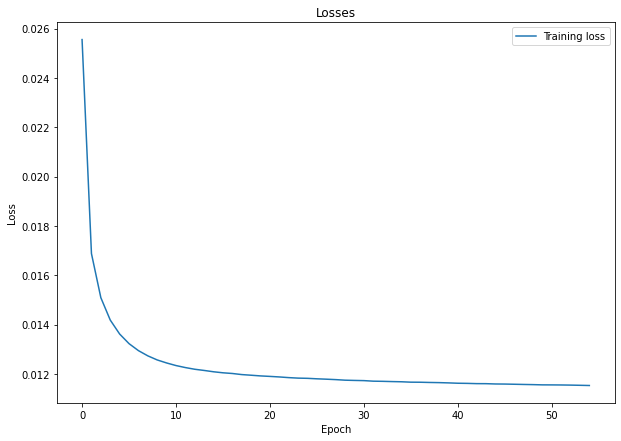

In [3]:
plt.figure(figsize=(10,7))

plt.plot(history["trainlosses"], label="Training loss")
plt.plot(history["validlosses"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Losses")
plt.legend()

plt.show()

In [4]:
testset = CelebA("data", "test", download=False, transform=transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()]))
testloader = DataLoader(testset, 1, shuffle=True)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torchvision/transforms/transforms.py:1643: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = torch.tensor(value)[:, None, None]


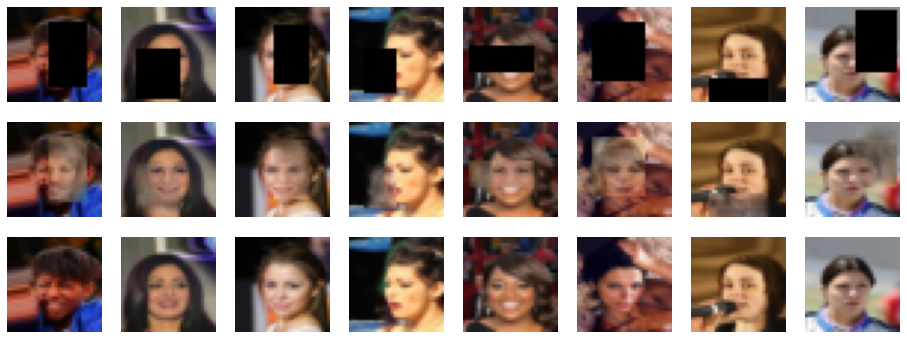

In [5]:
model.eval()
fig, ax = plt.subplots(3, 8, figsize=(16, 6))

for i, (images, _) in enumerate(testloader):
    images = images.to(device)[0]
    # masked, mask = mask_random(images, 0.1)
    masked, mask = mask_rectangle(images, (0.1, 0.4), (1/3, 3))

    s, x = to_coords(images, mask.logical_not())
    s_pred = model(masked, mask, normalize_coords(x))

    ax[0, i].imshow(to_pil_image(masked))
    ax[1, i].imshow(to_pil_image(from_coords((3, 32, 32), x, s_pred) + images * mask))
    ax[2, i].imshow(to_pil_image(images))

    if i == 7:
        break
        
[p.set_axis_off() for p in ax.ravel()]
fig.show()